### A Puzzling Bisection
***

The July 13th 2018 Riddler Classic from [FiveThirtyEight](https://fivethirtyeight.com/features/can-you-slice-this-in-half/) asks the following: 

> Say you have an “L” shape formed by two rectangles touching each other. These two rectangles could have any dimensions and they don’t have to be equal to each other in any way. (A few examples are shown below.) 
> ![title](https://fivethirtyeight.com/wp-content/uploads/2018/07/rectangles.jpeg?w=575)
> Using only a straightedge and a pencil (no rulers, protractors or compasses), how can you draw a single straight line that cuts the L into two halves of exactly equal area, no matter what the dimensions of the L are? You can draw as many lines as you want to get to the solution, but the bisector itself can only be one single straight line.

Before we attempt to bisect the L-shapes in question, we start by noting an interesting fact about rectangles, since the L-shapes are made up of rectangles after all.  Rectangles, like ellipses, hexagons, and octagons, have an interesting property, that if you find the centroid of the shape, then any line that passes through that centroid will divide the shape into two halves of equal area.  

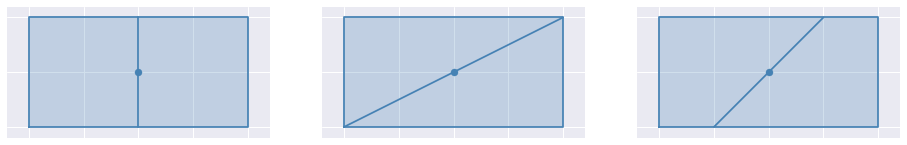

In [8]:
rectangleExamples()

We'll use this property of rectangles to accomplish our task.  So which rectangles should we attack?  There might be some merit to trying to first bisect the two rectangles that combine to make up the L-shape, but we'll take a different approach.  

Note that each L-shape can be thought of as a Big rectangle that has had a smaller rectangle removed from it. Consider the following representative L-shape: 

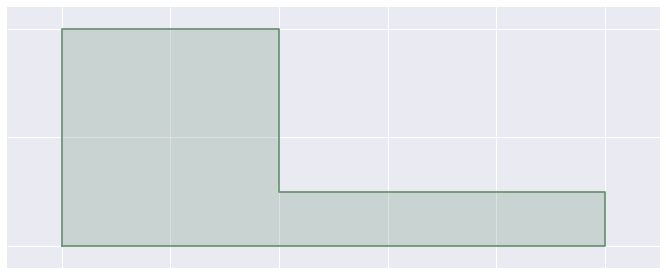

In [9]:
shape = LShape([[0,0], [0,2], [2,2], [2,0.5], [5,0.5], [5,0]])
shape.drawShape();

Using our straightedge, we can extend the horizontal line at the top of the L-shape, and the farthest vertical line to the right of the L-shape to form a Small rectangle. From this we can clearly see the Big rectangle from which subtracting the Small rectangle creates our L-shape. 

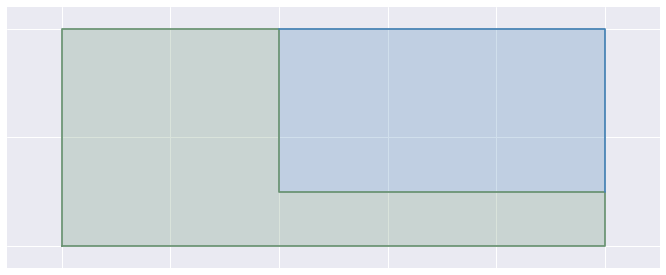

In [10]:
shape.drawBisection(stage=1);

Our next step will be to find the centroid of the Small rectangle.  We can do this easily with our straightedge by drawing two lines, each connecting opposing vertices of the rectangle.  The point where these two lines intersect is the centroid.  Then, any line that we draw that passes through the Small rectangle's centroid will bisect it into two equal halves. 

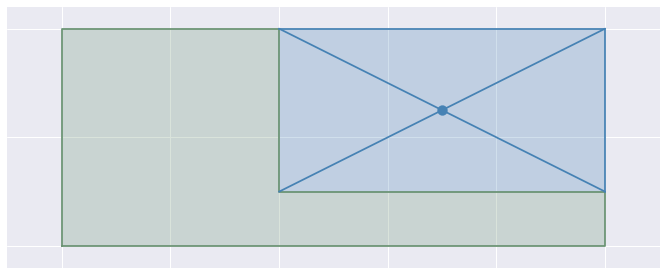

In [11]:
shape.drawBisection(stage=2);

Our next step will be to identify the centroid of the Big rectangle, which we can accomplish using our straightedge and following the same steps as above.  Again, any line that passes through the centroid of the Big rectangle will partition the Big rectangle into halves of equal area. 

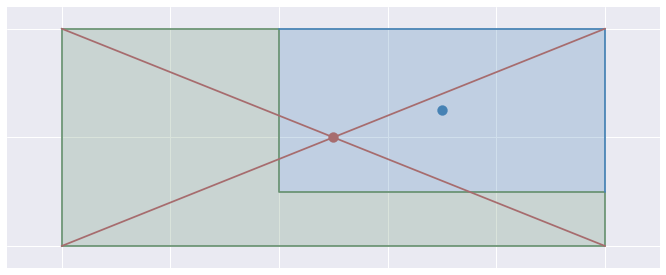

In [12]:
shape.drawBisection(stage=4);

Our final step is to draw the line that passes through the centroids of **both** the Big rectangle and the Small rectangle. Note that by doing so, we find a line that divides **both** the Big rectangle and the Small rectangle into halves of equal area. 

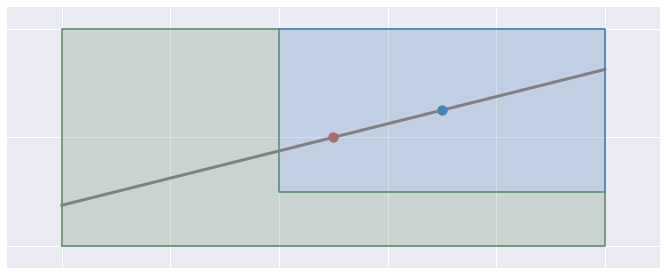

In [13]:
shape.drawBisection(stage=5);

Our claim is that by restricting this line to the L-shape, we successfully divide the L-shape into to shapes of equal area. Here is the result for our representative L-shape. 

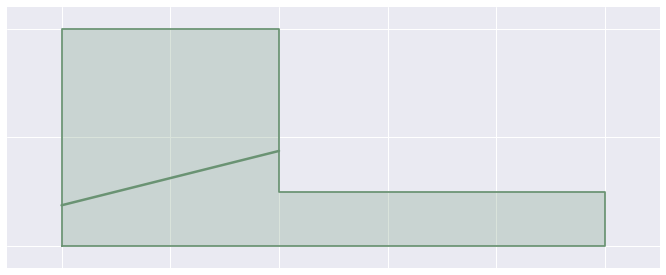

In [14]:
shape.drawBisection(stage=-1);

And here is the result of this process on a few other L-shapes: 

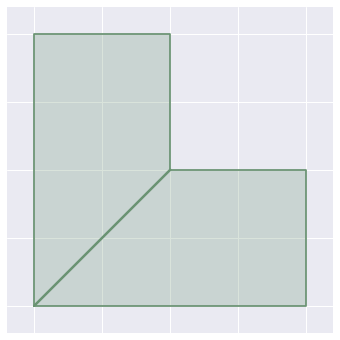

In [15]:
shape = LShape([[0,0], [0,4], [2,4], [2,2], [4,2], [4,0]])
shape.drawBisection(stage=-1, figsize=(6,6));

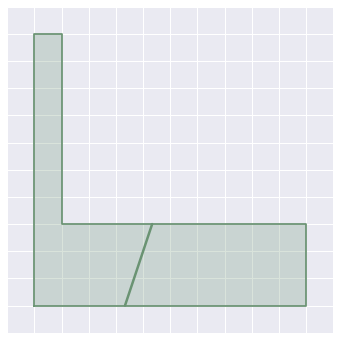

In [16]:
shape = LShape([[0,0], [0,10], [1,10], [1,3], [10,3], [10,0]])
shape.drawBisection(stage=-1, figsize=(6,6));

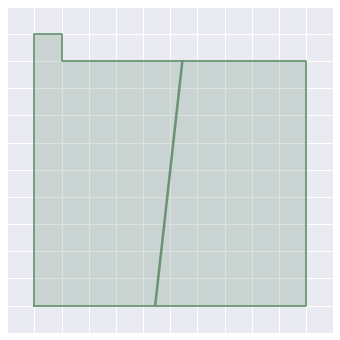

In [17]:
shape = LShape([[0,0], [0,10], [1,10], [1,9], [10,9], [10,0]])
shape.drawBisection(stage=-1, figsize=(6,6));

OK, so why does this work?  Why does finding a bisector of both the Big rectangle and the Small rectangle give us a bisector of the original L-shape? In words, we might say that if the the bisector divides the Big rectangle in half, and it divides the Small rectangle removed to construct the L-shape in half, then it must divide the L-shape in half as well.  

This becomes more clear if we use a little math. Let $A_L$ be the area of the L-shape, and $A_\textrm{big}$ and $A_\textrm{small}$ be the areas of the Big and Small rectangles, respectively.  Then, by construction, we must have that

$$
A_L = A_{\textrm{big}} - A_{\textrm{small}}
$$

Without loss of generality, lets focus on the portions of the three shapes that lie **above** the bisector.  We'll define the analogous areas of each shape above the bisector as $A_L^\uparrow$, $A_\textrm{big}^\uparrow$, and $A_\textrm{small}^\uparrow$. Then, it's easy to see that these areas satisfy the same relationship as their larger counterparts: 

$$
A_L^\uparrow = A_{\textrm{big}}^\uparrow - A_{\textrm{small}}^\uparrow
$$

Now, we know that by construction, the bisector divides the Big and Small rectangles in half, so we have 

$$
A_L^\uparrow = \dfrac{1}{2}A_{\textrm{big}} - \dfrac{1}{2}A_{\textrm{small}}
 = \dfrac{1}{2}\left(A_{\textrm{big}} - A_{\textrm{small}}\right)
$$

But, by definition, the difference between the areas of the Big and Small rectangles is the area of the L, so we have 

$$
A_L^\uparrow = 
\dfrac{1}{2}\left(A_{\textrm{big}} - A_{\textrm{small}}\right) =
\dfrac{1}{2}A_L
$$

Thus, the area of the L shape above our constructed bisector does contain exactly half of the area of the original shape. A similar argument shows that the analogous relationship holds for the portion of L below the bisector. 

<br> <br> <br> <br> <br> <br> <br> 
<br> <br> <br> <br> <br> <br> <br> 
### Helper Functions
***

In [18]:
import numpy as np 
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.ticker as plticker
%matplotlib inline 
sns.set()

class LShape:
    def __init__(self, vertices):
        """Initialize the shape
        Args:
            vertices (2D array of dimensions 6 x 2): the 6 vertices of the L shape 
        """
        
        # store vertices internally
        self.vertices = np.array(vertices).astype('float64') 
        
        # custom colors
        self.mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
        
    def drawShape(self, figsize=None):
        """Draw the original L-shape 
        """
        
        # get data range 
        xmin, xmax = np.min(self.vertices[:,0]), np.max(self.vertices[:,0])
        ymin, ymax = np.min(self.vertices[:,1]), np.max(self.vertices[:,1])
        
        # build figure 
        if not figsize: 
            figH, figW = 1.25*(ymax - ymin), 1.25*(xmax - xmin)
            figH, figW = (12/figW)*figH, (12/figW)*figW
            figsize = (figW, figH)
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
        
        # repeat the first vertex for one-shot plotting 
        verts = np.vstack((self.vertices, self.vertices[0,:]))
        
        # plot shape 
        ax.plot(verts[:,0], verts[:,1], color=self.mycolors["green"])
        
        # fill shape
        ax.fill(verts[:,0], verts[:,1], color=self.mycolors["green"], alpha=0.25)
        
        # make pretty 
        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

        ax.set_aspect('equal')

        ax.set_xticks(range(int(np.max(self.vertices[:,0]+.25)+1)))
        ax.set_yticks(range(int(np.max(self.vertices[:,1]+.25)+1)))
        
        margin = 0.1
        
        xmini, xmaxi = int(xmin-margin-1), int(xmax+margin+1)
        ymini, ymaxi = int(ymin-margin-1), int(ymax+margin+1)
        
        ax.set_xticks(range(xmini, xmaxi+1))
        ax.set_yticks(range(ymini, ymaxi+1))
        
        ax.margins(margin)
        
        return ax
    
    def drawBisection(self, stage = -1, figsize=None):
        """Draw the construction of the L-shape bisector
        """
        
        # Draw the L shape 
        ax = self.drawShape(figsize=figsize)
        
        # get data range 
        xmin, xmax = np.min(self.vertices[:,0]), np.max(self.vertices[:,0])
        ymin, ymax = np.min(self.vertices[:,1]), np.max(self.vertices[:,1])
        
        # Get vertex of the L-vertex 
        isXEx = np.logical_or(xmin == self.vertices[:,0], xmax == self.vertices[:,0])
        isYEx = np.logical_or(ymin == self.vertices[:,1], ymax == self.vertices[:,1])
        lVert = self.vertices[np.logical_and(~isXEx, ~isYEx),:].flatten()
        
        # Draw missinging rectangle
        missingRect = np.array([[lVert[0], ymax], [xmax, ymax], [xmax, lVert[1]], lVert, [lVert[0], ymax]])
        if stage in [1,2,3,4,5]:
            ax.plot(missingRect[:3,0], missingRect[:3,1], color=self.mycolors["blue"])
            ax.fill(missingRect[:,0], missingRect[:,1], color=self.mycolors["blue"], alpha=0.25)
        
        # Find center of missinging rectangle 
        missingCent = np.mean(missingRect[:-1,:], axis=0)
        if stage in [2,3]:
            ax.plot(missingRect[[0,2],0], missingRect[[0,2],1], color=self.mycolors["blue"])
            ax.plot(missingRect[[1,3],0], missingRect[[1,3],1], color=self.mycolors["blue"])
        if stage in [2,3,4,5]:
            ax.scatter([missingCent[0]], [missingCent[1]], s=100, color=self.mycolors["blue"], zorder=2)
        
        # Define the big rectangle 
        bigRect = np.array([[xmin, ymin], [xmin, ymax], [xmax, ymax], [xmax, ymin], [xmin, ymin]])
        bigCent = np.mean(bigRect[:-1,:], axis=0)
        if stage in [3,4]: 
            ax.plot(bigRect[[0,2],0], bigRect[[0,2],1], color=self.mycolors["red"])
            ax.plot(bigRect[[1,3],0], bigRect[[1,3],1], color=self.mycolors["red"])
        if stage in [4,5]: 
            ax.scatter([bigCent[0]], [bigCent[1]], s=100, color=self.mycolors["red"], zorder=2)
        
        # Find the line that goes through both centroids 
        slope = (bigCent[1]-missingCent[1])/(bigCent[0]-missingCent[0])
        intercept = bigCent[1] - slope * bigCent[0]
        y = lambda x: slope*x + intercept
        x0 = xmin if y(xmin) > ymin else (ymin - intercept)/slope 
        x1 = lVert[0] if y(lVert[0]) > lVert[1] else (lVert[1]-intercept)/slope 
        y0, y1 = y(x0), y(x1)
            
        # Plot the full bisecting line if requested 
        if stage in [5]:
            xb0, yb0 = (xmin, y(xmin)) if y(xmin) > ymin else ((ymin-intercept)/slope, ymin)
            xb1, yb1 = (xmax, y(xmax)) if y(xmax) < ymax else ((ymax-intercept)/slope, ymax)
            ax.plot([xb0, xb1], [yb0, yb1], color="gray", lw=3, zorder=1)
            
        if stage in [-1]:
            ax.plot([x0, x1], [y0, y1], color=self.mycolors["green"], lw=2.5)
        
        return ax 
    
def rectangleExamples():
    """Draw examples of the centroid used to bisect a rectangle
    """
    
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
    rect = np.array([[0,0], [0,2], [4,2], [4,0], [0,0]])
    
    for ax in axes:
        
        ax.plot(rect[:,0], rect[:,1], color=mycolors["blue"])
        ax.fill(rect[:-1,0], rect[:-1,1], color=mycolors["blue"], alpha=0.25)
        ax.scatter([2], [1], s=50, color=mycolors["blue"])
        
        xmin, xmax = 0, 4
        ymin, ymax = 0, 2
        
        # make pretty 
        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

        ax.set_aspect('equal')

        ax.set_xticks(range(int(np.max(rect[:,0]+.25)+1)))
        ax.set_yticks(range(int(np.max(rect[:,1]+.25)+1)))
        
        margin = 0.1
        
        xmini, xmaxi = int(xmin-margin-1), int(xmax+margin+1)
        ymini, ymaxi = int(ymin-margin-1), int(ymax+margin+1)
        
        ax.set_xticks(range(xmini, xmaxi+1))
        ax.set_yticks(range(ymini, ymaxi+1))
        
        ax.margins(margin)
        
    axes[0].plot([2,2], [0,2], color=mycolors["blue"])
    axes[1].plot([0,4], [0,2], color=mycolors["blue"])
    axes[2].plot([1,3], [0,2], color=mycolors["blue"])